# Muhammad Saad

# i191891@nu.edu.pk

In [3]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
f = open('data.txt', encoding='utf-8')
text=f.read()
# print(w)

In [3]:
corpus = []
def create_corpus(text):

    for x in text.lower().split():
        corpus.append(x)
    

In [4]:
def generate_ngrams(text, n_gram=1, stop=True):


    z = zip(*[text[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]

    return ngrams

In [5]:
create_corpus(text)

In [6]:
vocabulary = set(corpus)

In [7]:
Total_word=len(corpus)

In [8]:
unigrams = defaultdict(int)

In [9]:
for word in corpus:
        unigrams[word] += 1

In [10]:
len(unigrams)

35834

In [11]:
unigrams.items()

dict_items([('sai', 1585), ('kha', 5902), ('ya', 176586), ('her', 1558), ('kisi', 86229), ('kay', 5470), ('bus', 2075), ('ki', 1127057), ('bat', 6252), ('nhi', 18233), ('hai', 1361813), ('lakin', 502), ('main', 11395), ('hal', 7099), ('kal', 16414), ('bi', 8809), ('aj', 5743), ('aur', 1337352), ('sirf', 192889), ('aus', 29), ('say', 10977), ('kya', 588538), ('bt', 876), ('wah', 5724), ('je', 846), ('are', 7919), ('wha', 99), ('kaya', 948), ('baat', 106986), ('likhi', 1649), ('allah', 1739), ('rehm', 57), ('farma', 1020), ('hm', 895), ('sab', 208914), ('pe', 11418), ('or', 14515), ('zalimo', 21), ('ko', 604472), ('hidayat', 230), ('de', 11737), ('ameen', 2261), ('insaaf', 4916), ('karey', 165), ('thik', 1226), ('kaha', 178128), ('right', 1329), ('jee', 21180), ('ye', 26236), ('to', 212529), ('he', 35362), ('yeh', 747312), ('toh', 17643), ('hy', 7033), ('bohat', 191456), ('khoob', 4960), ('so', 34274), ('true', 499), ('alhamdulillah', 248), ('mara', 12010), ('jasa', 59), ('masom', 9), ('

In [12]:
df_unigrams = pd.DataFrame(sorted(unigrams.items(), key=lambda x: x[1], reverse=True))
sorted(unigrams.items(), key=lambda x: x[1], reverse=True)[:10]


[('mein', 1873511),
 ('ka', 1727114),
 ('par', 1593513),
 ('is', 1470312),
 ('woh', 1458193),
 ('hai', 1361813),
 ('aur', 1337352),
 ('aik', 1315467),
 ('ke', 1256290),
 ('ki', 1127057)]

In [13]:
df_unigrams.head()

,0,1
0,mein,1873511
1,ka,1727114
2,par,1593513
3,is,1470312
4,woh,1458193


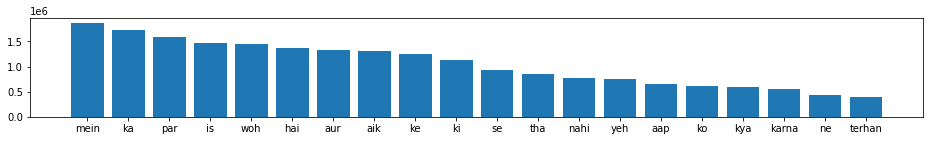

In [14]:
d1 = df_unigrams[0][:20]
d2 = df_unigrams[1][:20]

plt.figure(1, figsize=(16, 4))
plt.subplot(2, 1, 1)
_ = plt.bar(d1, d2)

In [15]:
df_unigrams

,0,1
0,mein,1873511
1,ka,1727114
2,par,1593513
3,is,1470312
4,woh,1458193
...,...,...
35829,khlaf,1
35830,primer,1
35831,sino,1
35832,gusto,1


# Calculate unigram probability

In [16]:
for word in unigrams:
    probability=unigrams[word]/Total_word
    unigrams[word]=probability

In [17]:
unigrams['alhamdulillah']

3.924617218473122e-06

In [18]:
#create dictionary for correct -> wrong word
mis_spelling={}
file = open('misspellings.txt', encoding='utf-8')
text=file.readlines()
for line in text:
    i=0
    for word in line.split(','):
        if i==0:
            correct=word
            i+=1
#             print(correct)
        word=word.replace("\t", ",")
        word=word.replace("\n", "")
        mis_spelling[correct]=word
        
        

In [19]:
mis_spelling['sai']

' vsai,saih,sdai,saio,sazi,szai,sac,psai'

In [20]:
#Error Model

In [8]:
#Calculate minimum edit distance 

def min_edit_distance(target,source):
    #Target -> Correct word
    #source -> written word
    #build matrix of correct size
    
    (m,n)=(len(target)-1,len(source)-1)
    
    target=[w for w in target]
    source=[w for w in source]
    #2-D Matrix
    sol=np.zeros((len(source),len(target)))
    
    #first row & column
    sol[0]=[j for j in range(len(target))]
    sol[:,0]=[j for j in range(len(source))]
    
    #add value
    if target[1] != source[1]:
        sol[1,1]=2
    #Through every column 
    for c in range(1,len(target)):
        #Through every row
        for r in range(1,len(source)):
            #Not same letter
            if target[c] != source[r]:
                sol[r,c]=min(sol[r-1,c],sol[r,c-1])+1
                
            #same letter
            else:
                sol[r,c]=sol[r-1,c-1]
                
#     return sol
    return sol[n][m]
    
    

In [9]:
min_edit_distance("#ATTTGCGCAGACCTAAGCA","#GCA")

16.0

# Create insert, delete, substitution and transposition tables for alphabets a-z using the provided misspellings.txt. The tables can be implemented using Python dictionaries.

In [23]:
#create matrix 

insert_matrix = [[0 for i in range(26)] for j in range(26)]

delete_matrix = [[0 for i in range(26)] for j in range(26)]

replace_matrix = [[0 for i in range(26)] for j in range(26)]

transpose_matrix = [[0 for i in range(26)] for j in range(26)]

    

In [24]:
def split(word):
    return [(word[:i], word[i:]) for i in range(len(word) + 1)]


def delete(word):
    return [l + r[1:] for l,r in split(word) if r]


def transpose(word):
    return [l + r[1] + r[0] + r[2:] for l, r in split(word) if len(r)>1]

def replace(word):
    letters = string.ascii_lowercase
    return [l + c + r[1:] for l, r in split(word) if r for c in letters]

def insert(word):
    letters = string.ascii_lowercase
    return [l + c + r for l, r in split(word) for c in letters]




In [25]:
split('kaz')

[('', 'kaz'), ('k', 'az'), ('ka', 'z'), ('kaz', '')]

In [26]:
delete('kaz')

['az', 'kz', 'ka']

In [27]:
transpose('kaez')

['akez', 'keaz', 'kaze']

In [28]:
#dictionary create delete 
Delete_Matrix = defaultdict(int)
Insert_Matrix = defaultdict(int)

In [29]:
#check not match character 
def compare_delete(c,w):
    l=[]
    l[:0]=w
    for i in c:
        if i in l:
            l.remove(i)
    a=""
    return (a.join(l))
    


In [30]:
def compare_insert(c,w):
    l=[]
    l[:0]=c
    for i in w:
        if i in l:
            l.remove(i)
    a=""
    return (a.join(l))

    

In [31]:
#Check the character level
def a(correct,wrong):
    xi=""
    wi=""
    if(len(correct)==len(wrong)):
        
        for i in range(0,len(correct)):
            if(correct[i] != wrong[i]):
                
                wi = correct[i]
                xi = wrong[i]

                break
                
                if(i < len(wrong)-1):
                    wi = wrong[i+1] + wrong[i]
                    xi = wrong[i] + wrong[i+1]
                    break
    else:
        if(wrong[:len(wrong)-1] == correct):
            wi = wrong[len(wrong)-2:len(wrong)-1]
            xi = wrong[len(wrong)-1:len(wrong)]
            
            return wi, xi
        
        elif(correct[:len(correct)-1] == wrong):
            
            wi = correct[len(correct)-2:len(correct)-1]
            xi = correct[len(correct)-1:len(correct)]
            
            return wi, xi
        else:
            
            for index in range(0,  min(len(correct), len(wrong))):
                if(correct[index] != wrong[index]):
                    xi = correct[index]
                    wi = wrong[index]
                    
                    break
                    

    return wi, xi         
            

In [32]:
a('Lamp','Lapm')

('m', 'p')

In [33]:
compare_insert('andaza','andza')

'a'

In [34]:
#Matrix insert,delete,transpose and replace  values enter 
indexes = {' ':0,'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

for i,correct_word in enumerate(mis_spelling):
    if(i>0):
        for wrong_word in mis_spelling[correct_word].split(','):
            
            if(correct_word in delete(wrong_word)):
                
                c=compare_delete(correct_word,wrong_word)
              
                Delete_Matrix[c]+=1
                
                wi,xi=a(correct_word,wrong_word)
                Y_AXIS = indexes[wi]
                X_AXIS = indexes[xi]
                
                delete_matrix[X_AXIS][Y_AXIS] += 1
                
#                 print(correct_word,wrong_word)
            elif (correct_word in insert(wrong_word)):
        
                c=compare_insert(correct_word,wrong_word)
                Insert_Matrix[c]+=1
                #print(correct_word,wrong_word)
                
                wi,xi=a(correct_word,wrong_word)
                Y_AXIS = indexes[wi]
                X_AXIS = indexes[xi]
                
                insert_matrix[X_AXIS][Y_AXIS] += 1
            elif (correct_word in transpose(wrong_word)):
                
                wi,xi=a(correct_word,wrong_word)
                Y_AXIS = indexes[wi]
                X_AXIS = indexes[xi]
                
                transpose_matrix[X_AXIS][Y_AXIS] += 1
                
            elif (correct_word in replace(wrong_word)):
                
                wi,xi=a(correct_word,wrong_word)
                Y=indexes[wi]
                X=indexes[xi]
                
                replace_matrix[X][Y] +=1
                
                break
 
                


In [35]:
Delete_Matrix

defaultdict(int,
            {'c': 1485,
             'm': 1441,
             'g': 1465,
             'y': 1444,
             'b': 1430,
             'o': 1334,
             'u': 1390,
             'q': 1475,
             't': 1417,
             'j': 1506,
             'r': 1415,
             'e': 1399,
             'v': 1466,
             'x': 1517,
             'n': 1318,
             'd': 1475,
             'z': 1496,
             'h': 1360,
             'f': 1523,
             's': 1393,
             'w': 1516,
             'p': 1471,
             'a': 1141,
             'l': 1464,
             'k': 1404,
             'i': 1307})

In [36]:
Total_Delete_Matrix=sum(Delete_Matrix.values())

In [37]:
Insert_Matrix

defaultdict(int,
            {'n': 37,
             'a': 153,
             'u': 32,
             'r': 52,
             'e': 60,
             'm': 26,
             'l': 32,
             'o': 33,
             'i': 52,
             'f': 8,
             'k': 21,
             'c': 11,
             'h': 45,
             'z': 8,
             't': 40,
             'b': 17,
             'v': 4,
             's': 28,
             'q': 3,
             'd': 28,
             'g': 16,
             'p': 14,
             'j': 6,
             'w': 8,
             'y': 11,
             'x': 1})

In [38]:
Total_Insert_Matrix=sum(Insert_Matrix.values())

Total_Replace_Matrix=sum(sum(replace_matrix,[])) 

Total_Transpose_Matrix=sum(sum(transpose_matrix,[])) 

# calculates P(x|w)

In [39]:
def channel_Model_Probability(candidate_word,input_word):
    probability=0
    
    if(candidate_word in delete(input_word)):
        
        c=compare_delete(candidate_word,input_word)
        #                 print(c)
        probability=Delete_Matrix[c]/Total_Delete_Matrix

#         print(probability)
    
    elif (candidate_word in insert(input_word)):
        
        c=compare_insert(candidate_word,input_word)
        #                 print(c)

        probability=Insert_Matrix[c]/Total_Insert_Matrix

#         print(probability)  
                
    elif (candidate_word in transpose(input_word)):
        
        wi,xi=a(candidate_word,input_word)
        Y = indexes[wi]
        X = indexes[xi]



        probability= transpose_matrix[X][Y] / Total_Transpose_Matrix   

#         print(probability)
        
    elif (candidate_word in replace(input_word)):
                
        wi,xi=a(candidate_word,input_word)
        Y_AXIS = indexes[wi]
        X_AXIS = indexes[xi]

        probability= replace_matrix[X_AXIS][Y_AXIS] / Total_Replace_Matrix   

#         print(probability)  
                
    return probability
                

    
    

In [40]:
channel_Model_Probability('nhai','nhae')

0.0020788504321820637

# set of candidate

In [41]:
def edit1(word):
    return set(delete(word) + transpose(word) + replace(word) + insert(word))

def edit2(word):
    return set(e2 for e1 in edit1(word) for e2 in edit1(e1))

In [63]:
def correct_spelling(word, vocabulary, word_probabilities):
    if word in vocabulary:
        print(f"{word} is already correctly spelt")
        
        return
    else:
        suggestions = edit1(word) or edit2(word) or [word]
        best_guesses = [w for w in suggestions if w in vocabulary]
        
        return [(w, word_probabilities[w]) for w in best_guesses]

In [64]:
correct_spelling('appel', vocabulary, unigrams)

[('papel', 3.165013885865421e-08),
 ('apple', 5.538774300264488e-07),
 ('appeal', 1.4654014291556901e-05)]

In [65]:
def set_of_candidate(word):
    corrections = correct_spelling(word, vocabulary, unigrams)
    if corrections:
        print(corrections)
        probs = np.array([c[1] for c in corrections])
        best_ix = np.argmax(probs)
        correct = corrections[best_ix][0]
        print()
        print('--- suggested word ---')
        print(f"{correct} is suggested for {word}")

In [134]:
set_of_candidate('cqde')
    
    

[('code', 3.165013885865421e-05)]

--- suggested word ---
code is suggested for cqde


# character-level language model

In [135]:
#bigram model characcter level
UnigramCounts = defaultdict(int)

BigramCounts = defaultdict(int)

for sentence in corpus:
    for i in range(len(sentence) - 1):
        token1 = sentence[i]
        token2 = sentence[i + 1]
        
        UnigramCounts[token1] += 1
        BigramCounts[(token1, token2)] += 1

    UnigramCounts[sentence[-1]] += 1

In [136]:
UnigramCounts

defaultdict(int,
            {'s': 11123713,
             'a': 61215602,
             'i': 21156833,
             'k': 15094087,
             'h': 23399958,
             'y': 6922251,
             'e': 16187901,
             'r': 15514837,
             'b': 6203369,
             'u': 6635599,
             't': 10417311,
             'n': 15830622,
             'l': 6741876,
             'm': 8154672,
             'j': 3116738,
             'f': 1594870,
             'w': 3549251,
             'p': 5393392,
             'o': 10532080,
             'z': 2363619,
             'd': 6035947,
             'g': 3139263,
             'c': 2859542,
             'v': 230208,
             'q': 1426466,
             'x': 32400})

In [143]:
bigram_model = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in corpus:
    for i in range(len(sentence) - 1):
        token1 = sentence[i]
        token2 = sentence[i + 1]

        bigram_model[(token1)][token2] += 1

for w1 in bigram_model:
    total_count = float(sum(bigram_model[w1].values()))
    for w3 in bigram_model[w1]:
        bigram_model[w1][w3] /= total_count

# candidate correct sentences

In [124]:
def candidate_words(word, vocabulary, word_probabilities):
    
    if word in vocabulary:
        return word
    

    suggestions = edit1(word) or edit2(word) or [word]
    best_guesses = [w for w in suggestions if w in vocabulary]
    
    corrections= [(w, word_probabilities[w]) for w in best_guesses]
    
    if corrections:
#         print(corrections)
        probs = np.array([c[1] for c in corrections])
        best_ix = np.argmax(probs)
        correct = corrections[best_ix][0]
        
#         print(correct[0])
        
        return correct



def candidate_sentence(sentence):
    
    candidate_sentences =""

    for word in sentence.split():
        a=candidate_words(word, vocabulary, unigrams)

        candidate_sentences += " " +a
        
    return candidate_sentences


In [128]:
s="qj kzy dzn"
candidate_sentence(s)

' aj kay din'